# Tarea 5 -  Bayes Ingenuo

### ITESM - Escuela de Ingeniería y Ciencias
#### Maestría en Ciencias Computacionales
#### Aprendizaje Automático

---

## Carlos E. Hdz Rincón - A01181616

# 1
Con base a la lectura del siguiente artículo, contesta las preguntas de los incisos:
https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf

## a)
¿Cuál es la diferencia entre el método del Bayes Ingenuo (Naïve Bayes) y el
Bayes ingenuo aumentado (Augmented Naïve Bayes)?

---

En Bayes Ingenuo, cada atributo no tiene otro padre más que el nodo de la clase.

Bayes ingenuo es la forma más simple de una red Bayesiana, donde todos los atributos son independientes dado el valor de la variable de clase, conocido como independiencia condicional, pero esta independencia condicional es raro en aplicaciones reales.

Una forma de arreglar esta limitación del Bayes ingenuo es extender su estructura para representar explicítamente las dependencias entre los atributos.

Bayes ingenuo aumentado (ANB), es un Bayes ingenuo extendido en el que los nodos de clase apunta directamente a todos los nodos de atributos y existen vínculos entre los nodos de atributos.

## b)
¿Cómo justifica el autor del artículo que el método del Bayes ingenuo funcione tan bien como método de clasificación, aún cuando la condición de que los eventos sean condicionalmente independientes con respecto a las clases casi nunca se cumple en los problemas reales?

---

Porque no importa qué tan fuerte sea la dependencia entre los atribuos, Bayes ingenuo puede aún ser óptimo si las dependencias se distribuyen equitativamente entre las clases o si las dependencias se cancelan las unas a las otras. Se ha observado que el accuracy puede ser muy bueno incluso cuando hay fuertes dependencias entre los atributos.

Domingos y Pazzani (Domings & Pazzani 1997) presentan una explicación que Bayes Ingenuo debe su buen performance de clasificación debiso a la función de pérdida Zero-One que establece el error como el número de clasificaciones incorrectas, es decir, no importa si el modelo no está muy seguro de la clase predicha siempre y cuando la clase con mayor probabilidad siga siendo la correcta.

Zhang (Zhang 2004) va más allá y sugiere que además de esto, el performance está afectado por la distribución de las dependencias, en lugar de las dependencias mismas entre los atributos.

# 2
En el siguiente artículo: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.61.5542&rep=rep1&type=pdf se habla de que existen varios modelos basados en el Bayes Ingenuo (NB) de acuerdo al tipo de datos que tenga el problema: continuos, categóricos, binarios,
etc.

En particular en este ejercicio veremos un problema con dos tipos de datos: categóricos y continuos. Las librerías en general contienen soluciones para un solo tipo de dato. Cuando se tienen varios tipos de datos se pueden proponer diversas formas de enfrentar el problema.

En particular en este ejercicio lo resolverás primero modelando las variables categóricas por un lado (usando el modelo NB para variables categóricas) y las variables continuas por otro (usando el modelo gaussiano del NB).

Finalmente propondrás la solución al problema biclase mediante el producto de ambas predicciones probabilísticas.

Trabajarás con la base de datos de la UCI referente a solicitudes de tarjetas de crédito de clientes australianos. Deberás descargar el archivo “australian.dat” de la siguiente liga y contestar los incisos que se indican a continuación:

https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB

# Connect to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
data_root_location = "/content/drive/My Drive/AprendizajeAutomatico/Assignment5/"
train_filename = "australian.dat"

# The headers are A1-A15
file_headers = [f"A{idx}" for idx in range(1, 16)]

data = pd.read_csv(f"{data_root_location}{train_filename}",
                        names=file_headers,
                        sep="\s",
                        engine="python")
print(data.head())
print(f"Train: {data.shape}")

   A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  A15
0   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2  100  1213    0
1   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2  160     1    0
2   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2  280     1    0
3   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2    0     1    1
4   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   60   159    1
Train: (690, 15)


## a) 
Agrega los nombres a las columnas como se indica en la página de la UCI y realiza un análisis descriptico de los datos. Escribe tus conclusiones.

In [5]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [6]:
data.median()

A1       1.000
A2      28.625
A3       2.750
A4       2.000
A5       8.000
A6       4.000
A7       1.000
A8       1.000
A9       0.000
A10      0.000
A11      0.000
A12      2.000
A13    160.000
A14      6.000
A15      0.000
dtype: float64

### Valores nulos

In [7]:
data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [8]:
data.mode(axis=0)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,31.57,1.5,2,8,4,0.0,1,0,0,0,2,0,1,0


A1        AxesSubplot(0.125,0.749828;0.227941x0.130172)
A2     AxesSubplot(0.398529,0.749828;0.227941x0.130172)
A3     AxesSubplot(0.672059,0.749828;0.227941x0.130172)
A4        AxesSubplot(0.125,0.593621;0.227941x0.130172)
A5     AxesSubplot(0.398529,0.593621;0.227941x0.130172)
A6     AxesSubplot(0.672059,0.593621;0.227941x0.130172)
A7        AxesSubplot(0.125,0.437414;0.227941x0.130172)
A8     AxesSubplot(0.398529,0.437414;0.227941x0.130172)
A9     AxesSubplot(0.672059,0.437414;0.227941x0.130172)
A10       AxesSubplot(0.125,0.281207;0.227941x0.130172)
A11    AxesSubplot(0.398529,0.281207;0.227941x0.130172)
A12    AxesSubplot(0.672059,0.281207;0.227941x0.130172)
A13          AxesSubplot(0.125,0.125;0.227941x0.130172)
A14       AxesSubplot(0.398529,0.125;0.227941x0.130172)
A15       AxesSubplot(0.672059,0.125;0.227941x0.130172)
dtype: object

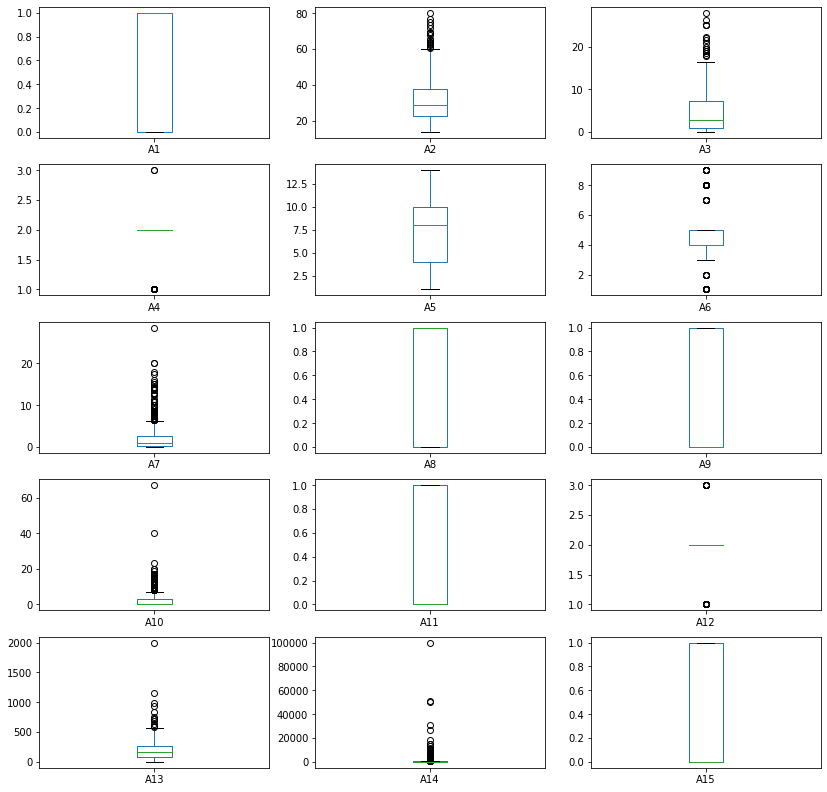

In [9]:
data.plot.box(subplots=True, layout=(5,3), figsize=(14,14))

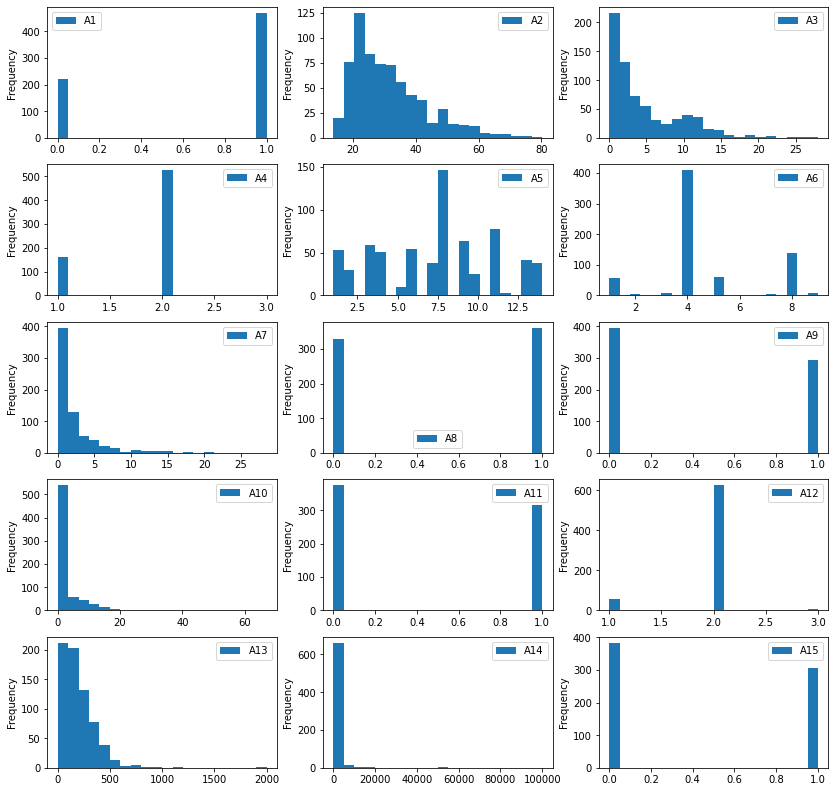

In [10]:
def plot_histogram(df: pd.DataFrame, nrows: int, ncols: int):

    fig, ax = plt.subplots(nrows=nrows,
                           ncols=ncols,
                           figsize=(14,14))
    
    for n, col in enumerate(df.columns):
        plt.subplot(nrows, ncols, n+1)
        df[col].plot.hist(ax = plt.gca(),
                          bins=20,
                          legend=True)

plot_histogram(data, 5, 3)

In [11]:
data.corr(method="pearson")

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
A1,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301
A10,-0.008427,0.185574,0.271207,0.106457,0.150166,0.098841,0.322330,0.379532,0.571498,1.000000,0.006944,0.101479,-0.119808,0.063692,0.406410


In [12]:
num_class_0 = len(data[data['A15'] == 0])
num_class_1 = len(data[data['A15'] == 1])
print(f"Elementos para clase 0: {num_class_0}")
print(f"Elementos para clase 1: {num_class_1}")

Elementos para clase 0: 383
Elementos para clase 1: 307


---
### Conclusiones

En general, no se presentan valores nulos o vacíos y esto concuerda con las operaciones que se describieron para rellenarlos en el documento original de UCI. Tampoco se presenta una alta correlación de Pearson entre las variables independientes, sólo unos cuantos casos de correlación moderada; el dataset es mayormente independiente en sus atributos.

Se poseen 383 casos para la clase positiva 0 y 307 para la clase negativa 1

* Categóricas
    1. A1
    1. A4
    1. A5
    1. A6
    1. A8
        * Presenta significativa correlación con la variable dependiente A15
    1. A9
        * Presenta moderada correlación con A10
        * Presenta moderada correlación con la variable dependiente A15
    1. A11
    1. A12
    1. A15
        * La variable dependiente

* Continuas

    1. A2
        * Presenta bastantes outliers por encima del 3er cuartil
        * Presenta un ligero sesgo a la derecha
    1. A3
        * Presenta bastantes outliers por encima del 3er cuartil
        * Presenta un sesgo a la derecha
    1. A7
        * Presenta bastantes outliers por encima del 3er cuartil
        * Presenta un pronunciado sesgo a la derecha

    1. A10
        * Presenta bastantes outliers por encima del 3er cuartil
        * Presenta un pronunciado sesgo a la derecha
        * Presenta moderada correlación con A9
    1. A13
        * Presenta mucha varianza y un rango de valores muy alto en comparación con las demás categóricas.
        * Presenta bastantes outliers por encima del 3er cuartil
        * Presenta un pronunciado sesgo a la derecha
    1. A14
        * Presenta mucha varianza y un rango de valores muy alto en comparación con las demás categóricas. 
        * Presenta un pronunciado sesgo a la derecha

## b)
Realiza una partición de los datos en 80% de entrenamiento y 20% de prueba.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("A15", axis=1),
                                                    data[["A15"]],
                                                    train_size=0.8,
                                                    random_state=42)

## c)
Separa los datos de entrenamiento y de prueba en dos conjuntos: los que tienen datos categóricos serán un conjunto y los que tienen datos continuos un segundo conjunto. Apóyate en la información de las variables dada en la página de la UCI.

En los siguientes incisos usarás la librería scikit-learn y deberás identificar el modelo adecuado a utilizar en cada caso:

https://scikit-learn.org/stable/modules/naive_bayes.html

In [14]:
continuous_vars = [
                   "A2",
                   "A3",
                   "A7",
                   "A10",
                   "A13",
                   "A14"
                  ]
X_train_cont = X_train[continuous_vars]
X_test_cont = X_test[continuous_vars]

categorical_vars = [
                    "A1",
                    "A4",
                    "A5",
                    "A6",
                    "A8",
                    "A9",
                    "A11",
                    "A12"
                  ]
X_train_cat = X_train[categorical_vars]
X_test_cat = X_test[categorical_vars]

## d) !
Aplica el modelo de Bayes Ingenuo al conjunto de datos de entrenamiento categóricos. Obtener la matriz de confusión con las datos de prueba categóricos, así como el porcentaje de exactitud (accuracy).

In [15]:
def print_metrics(y_true, y_pred):
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Puntos no categorizados correctamente: %d/%d" 
      % ((y_test.values.ravel() != y_pred).sum(), X_test_cat.shape[0]))
    
    print("\n")
    print(metrics.classification_report(y_true, y_pred))

catNB = CategoricalNB()
catNB.fit(X_train_cat, y_train.values.ravel())

y_pred_cat = catNB.predict(X_test_cat)

print_metrics(y_test, y_pred_cat)

[[81  6]
 [11 40]]
Puntos no categorizados correctamente: 17/138


              precision    recall  f1-score   support

           0       0.88      0.93      0.91        87
           1       0.87      0.78      0.82        51

    accuracy                           0.88       138
   macro avg       0.88      0.86      0.86       138
weighted avg       0.88      0.88      0.88       138



## e) !
Aplica el modelo de Bayes Ingenuo al conjunto de datos de entrenamiento continuos. Obtener la matriz de confusión con las datos de prueba continuos, así como el porcentaje de exactitud (accuracy).

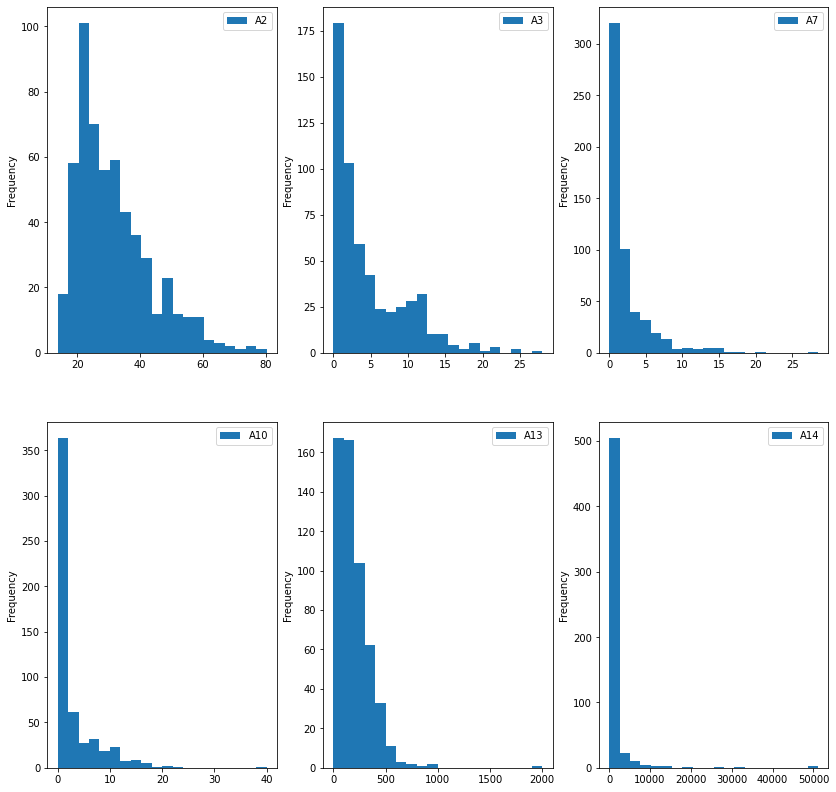

In [16]:
plot_histogram(X_train_cont, 2, 3)

In [29]:
X_train_cont.describe()

,A2,A3,A7,A10,A13,A14
count,552.000000,552.000000,552.00000,552.000000,552.000000,552.000000
mean,31.570145,4.661386,2.19327,2.485507,184.119565,1011.358696
std,11.854149,4.904988,3.31922,4.382750,172.104072,3970.740500
min,13.750000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,22.670000,0.905000,0.16500,0.000000,80.000000,1.000000
50%,28.580000,2.710000,1.00000,0.000000,160.000000,7.500000
75%,37.750000,7.010000,2.55125,3.000000,272.000000,478.250000
max,80.250000,28.000000,28.50000,40.000000,2000.000000,51101.000000


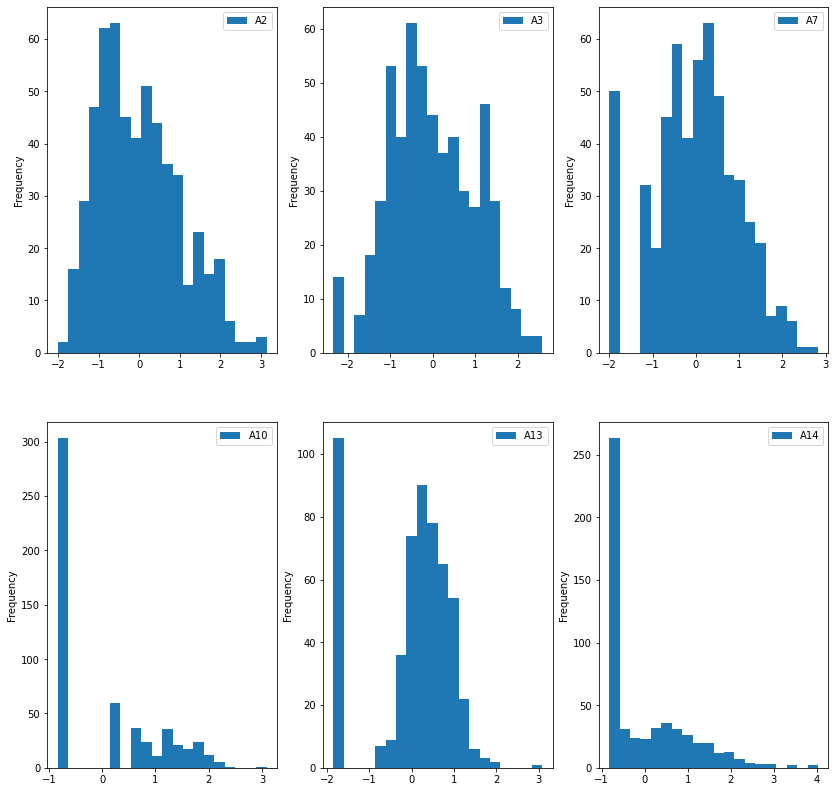

In [47]:
# Scale between [0,1]
def scale_range(column):
    return (column - np.min(column)) / (np.max(column) - np.min(column))

# Centering on 0
def center_std(column):
    return (column - np.mean(column)) / np.std(column)

def improve_data(df: pd.DataFrame):
    df = df.copy()

    # Combat biases
    df["A2"] = np.power(df["A2"], 1/4)
    df["A3"] = np.power(df["A3"], 1/3)
    df["A7"] = np.power(df["A7"], 1/4)
    df["A10"] = np.power(df["A10"], 1/3)
    df["A13"] = np.power(df["A13"], 1/3)
    df["A14"] = np.power(df["A14"], 1/5)

    #df["A2"] = np.log(df["A2"] + 1)
    #df["A3"] = np.log(df["A3"] + 1)
    #df["A7"] = np.log(df["A7"] + 1)
    #df["A10"] = np.log(df["A10"] + 1)
    #df["A13"] = np.log(df["A13"] + 1)
    #df["A14"] = np.log(df["A14"] + 1)

    columns_to_scale_ctr = ["A2",
                            "A3",
                            "A7",
                            "A10",
                            "A13",
                            "A14",
                            ]
    df[columns_to_scale_ctr] = scale_range(df[columns_to_scale_ctr])
    df[columns_to_scale_ctr] = center_std(df[columns_to_scale_ctr])

    return df


X_train_cont_trans = improve_data(X_train_cont)
plot_histogram(X_train_cont_trans, 2, 3)

In [52]:
contNB_trns = GaussianNB()
contNB_trns.fit(X_train_cont_trans, y_train.values.ravel())

y_pred_cont_trns = contNB_trns.predict(improve_data(X_test_cont))

print_metrics(y_test, y_pred_cont_trns)

[[69 18]
 [15 36]]
Puntos no categorizados correctamente: 33/138


              precision    recall  f1-score   support

           0       0.82      0.79      0.81        87
           1       0.67      0.71      0.69        51

    accuracy                           0.76       138
   macro avg       0.74      0.75      0.75       138
weighted avg       0.76      0.76      0.76       138



In [33]:
contNB_trns = GaussianNB()
contNB_trns.fit(X_train_cont_trans, y_train.values.ravel())

y_pred_cont_trns = contNB_trns.predict(improve_data(X_test_cont))

print_metrics(y_test, y_pred_cont_trns)

[[69 18]
 [14 37]]
Puntos no categorizados correctamente: 32/138


              precision    recall  f1-score   support

           0       0.83      0.79      0.81        87
           1       0.67      0.73      0.70        51

    accuracy                           0.77       138
   macro avg       0.75      0.76      0.75       138
weighted avg       0.77      0.77      0.77       138



In [37]:
contNB = GaussianNB()
contNB.fit(X_train_cont, y_train.values.ravel())

y_pred_cont = contNB.predict(X_test_cont)

print_metrics(y_test, y_pred_cont)

[[81  6]
 [32 19]]
Puntos no categorizados correctamente: 38/138


              precision    recall  f1-score   support

           0       0.72      0.93      0.81        87
           1       0.76      0.37      0.50        51

    accuracy                           0.72       138
   macro avg       0.74      0.65      0.66       138
weighted avg       0.73      0.72      0.70       138



## f) !
Obtener ahora las predicciones probabilísticas de los datos de prueba de ambos modelos, categórico y continuo. Realiza el producto de dichas probabilidades. Obtener la matriz de confusión del modelo final, así como su exactitud (accuracy).

In [49]:
y_pred_proba_cat = catNB.predict_proba(X_test_cat)
y_pred_proba_cont = contNB_trns.predict_proba(improve_data(X_test_cont))

# Get the mixed probabilities by naively assuming independence
y_pred_proba = np.multiply(y_pred_proba_cat, y_pred_proba_cont)

# Get the final categorical predictions for the classes by taking the highest
#  probability for each class
y_pred = np.argmax(y_pred_proba, axis=1)
print(y_pred)

[1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1]


## g) !
Obtener la precisión y sensibilidad del modelo final. Interpreta dichos resultados de acuerdo al problema.

In [50]:
print_metrics(y_test, y_pred)

[[82  5]
 [14 37]]
Puntos no categorizados correctamente: 19/138


              precision    recall  f1-score   support

           0       0.85      0.94      0.90        87
           1       0.88      0.73      0.80        51

    accuracy                           0.86       138
   macro avg       0.87      0.83      0.85       138
weighted avg       0.86      0.86      0.86       138



In [46]:
print_metrics(y_test, y_pred)

[[82  5]
 [21 30]]
Puntos no categorizados correctamente: 26/138


              precision    recall  f1-score   support

           0       0.80      0.94      0.86        87
           1       0.86      0.59      0.70        51

    accuracy                           0.81       138
   macro avg       0.83      0.77      0.78       138
weighted avg       0.82      0.81      0.80       138



---

### Conclusiones !

## h) 
Los siguientes incisos son para entender la manera en que se lleva a cabo el método del Bayes Ingenuo Gaussiano. No usaremos aquí los resultados obtenidos anteriormente, sino que usarás las fórmulas que vimos en clase en el tema de Bayes ingenuo para el ejemplo de Spam vs Ham; pero usando ahora la función de densidad gaussiana para calcular las probabilidades condicionales. Para ello usaremos los primeros siete datos de la base de datos de las solicitudes de crédito, pero tomando solo las variables continuas. Es decir, considera los datos de la tabla de abajo.

In [ ]:
h_headers = continuous_vars.copy()
h_headers.append("A15")
data_h = data[h_headers].head(7)
print(data_h)

      A2      A3     A7  A10  A13   A14  A15
0  22.08  11.460  1.585    0  100  1213    0
1  22.67   7.000  0.165    0  160     1    0
2  29.58   1.750  1.250    0  280     1    0
3  21.67  11.500  0.000   11    0     1    1
4  20.17   8.170  1.960   14   60   159    1
5  15.83   0.585  1.500    2  100     1    1
6  17.42   6.500  0.125    0   60   101    0


## i) TBD
Usa los primeros seis datos (renglones) para obtener las funciones de densidad condicional de cada uno de estos factores con respecto a cada una de las clases, y usar dichos resultados para predecir la clase del último dato (renglón 7). NOTA: El resultado debe ser de la clase 0 como se muestra en la tabla. Ver la sección 2.4 del artículo de autores griegos al inicio del problema.

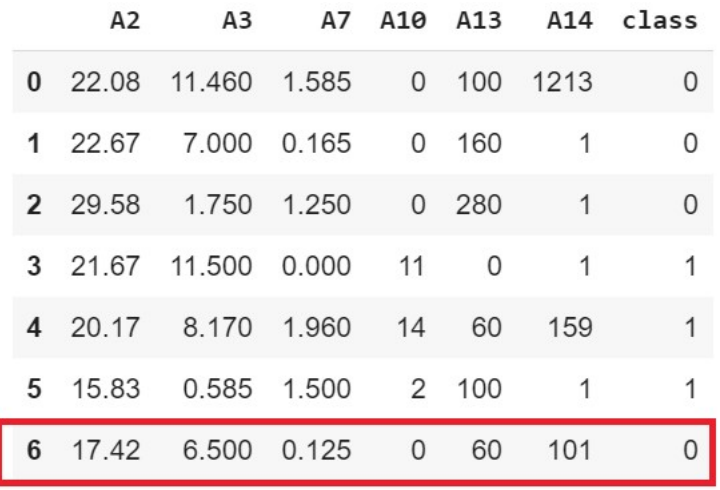

In [ ]:
datatrain_h = data_h.head(6)
datatest_h = data_h.iloc[[6]]

In [ ]:
X_train_h = datatrain_h.drop("A15", axis=1)
y_train_h = datatrain_h["A15"]
X_test_h = datatest_h.drop("A15", axis=1)
y_test_h = datatest_h["A15"]

In [ ]:
def calculate_mean_var(df: pd.DataFrame):
    return np.mean(df, axis=0), np.var(df, axis=0, ddof=1)

In [ ]:
def gaussian_dist(val, m, vr):
    first_term = 1 / (np.sqrt(2 * np.pi * vr))
    power_second_term = -((val - m)**2) / (2 * vr)
    second_term = np.e ** power_second_term

    return first_term * second_term

0.0010373357393022476

### ! DEBUG THIS

In [ ]:
def my_gaussian_predict(X, y, X_tst):
    # Calculate probabilities for each classes given its distribution
    total_count = len(X)
    p_0 = len(X[y == 0]) / total_count
    p_1 = len(X[y == 1]) / total_count

    # Calculate mean and sample var for each column
    mean_0, var_0 = calculate_mean_var(X[y == 0])
    mean_1, var_1 = calculate_mean_var(X[y == 1])

    # Start predictions
    pred_0 = p_0
    pred_1 = p_1

    for c in X.columns:
        # TODO: for each attribute, for each class, calculate the distribution
        m_0 = mean_0[c]
        vr_0 = var_0[c]

        m_1 = mean_1[c]
        vr_1 = var_1[c]

        val = X_tst[c]

        gauss_0 = gaussian_dist(val, m_0, vr_0)
        gauss_1 = gaussian_dist(val, m_1, vr_1)

        print("***********")
        print(f"c: {c}")
        print(f"val: {val}")
        print(f"m_0: {m_0}")
        print(f"vr_0: {vr_0}")
        print(f"Gauss0: {gauss_0}")
        print(f"m_1: {m_1}")
        print(f"vr_1: {vr_1}")
        print(f"Gauss1: {gauss_1}")
        print("=============")

        pred_0 *= gauss_0
        pred_1 *= gauss_1
    
    print(f"p_0: {p_0}")
    #print(f"mean_0: {mean_0}")
    #print(f"var_0: {var_0}")
    print(f"pred_0: {pred_0}")

    print(f"p_1: {p_1}")
    #print(f"mean_0: {mean_1}")
    #print(f"var_0: {var_1}")
    print(f"pred_1: {pred_1}")
    
    return pred_0 / pred_1

#my_gaussian_predict(X_train_h, y_train_h, X_test_h)


In [ ]:
test_data = {
    "tiempo": [47,51,55,49,41,38,50],
    "edad": [21,19,25,21,24,27,26],
    "peso": [45,55,51,67,71,77,87],
    "genero": [0,0,0,0,1,1,1]
}

testy = pd.DataFrame(test_data)
new_row = pd.DataFrame({
    "tiempo": [40],
    "edad": [22],
    "peso": [62]
})

my_gaussian_predict(testy.drop("genero", axis=1),
                    testy["genero"],
                    new_row)

***********
c: tiempo
val: 0    40
Name: tiempo, dtype: int64
m_0: 50.5
vr_0: 11.666666666666666
Gauss0: 0    0.001036
Name: tiempo, dtype: float64
m_1: 43.0
vr_1: 39.0
Gauss1: 0    0.05692
Name: tiempo, dtype: float64
***********
c: edad
val: 0    22
Name: edad, dtype: int64
m_0: 21.5
vr_0: 6.333333333333333
Gauss0: 0    0.155426
Name: edad, dtype: float64
m_1: 25.666666666666668
vr_1: 2.333333333333333
Gauss1: 0    0.014647
Name: edad, dtype: float64
***********
c: peso
val: 0    62
Name: peso, dtype: int64
m_0: 54.5
vr_0: 86.33333333333333
Gauss0: 0    0.030998
Name: peso, dtype: float64
m_1: 78.33333333333333
vr_1: 65.33333333333334
Gauss1: 0    0.006407
Name: peso, dtype: float64
p_0: 0.5714285714285714
pred_0: 0    0.000003
Name: tiempo, dtype: float64
p_1: 0.42857142857142855
pred_1: 0    0.000002
Name: tiempo, dtype: float64


0    1.246037
Name: tiempo, dtype: float64

In [ ]:
# Importing all needed libraries
import numpy as np
import math

# gaussClf will be the class that will have the Gaussian naive bayes classifier implimentation
class GaussClf:
    def separate_by_classes(self, X, y):
        ''' This function separates our dataset in subdatasets by classes '''
        self.classes = np.unique(y)
        classes_index = {}
        subdatasets = {}
        cls, counts = np.unique(y, return_counts=True)
        self.class_freq = dict(zip(cls, counts))
        print(self.class_freq)
        for class_type in self.classes:
            #classes_index[class_type] = np.argwhere(y==class_type)
            classes_index[class_type] = y==class_type

            #subdatasets[class_type] = X[classes_index[class_type], :]
            subdatasets[class_type] = X[classes_index[class_type]]
            self.class_freq[class_type] = self.class_freq[class_type]/sum(list(self.class_freq.values()))
        return subdatasets

    def fit(self, X, y):
        ''' The fitting function '''
        separated_X = self.separate_by_classes(X, y)
        self.means = {}
        self.std = {}
        for class_type in self.classes:
            # Here we calculate the mean and the standart deviation from datasets
            self.means[class_type] = np.mean(separated_X[class_type], axis=0)
            #self.std[class_type] = np.std(separated_X[class_type], axis=0)
            self.std[class_type] = np.var(separated_X[class_type], axis=0, ddof=1)

    def calculate_probability(self, x, mean, stdev):
        ''' This function calculates the class probability using gaussian distribution '''
        exponent = math.exp(-((x - mean) ** 2 / (2 * stdev)))
        return (1 / (math.sqrt(2 * math.pi * stdev))) * exponent

    def predict_proba(self, X):
        ''' This function predicts the probability for every class '''
        self.class_prob = {cls:math.log(self.class_freq[cls], math.e) for cls in self.classes}
        for cls in self.classes:
            for i in range(len(self.means)):
                print(X[i])
                self.class_prob[cls]+=math.log(self.calculate_probability(X[i], self.means[cls][i], self.std[cls][i]), math.e)
        self.class_prob = {cls: math.e**self.class_prob[cls] for cls in self.class_prob}
        return self.class_prob

    def predict(self, X):
        ''' This funtion predicts the class of a sample '''
        pred = []
        for x in X:
            pred_class = None
            max_prob = 0
            for cls, prob in self.predict_proba(x).items():
                if prob>max_prob:
                    max_prob = prob
                    pred_class = cls
            pred.append(pred_class)
        return pred

In [ ]:
gsc = GaussClf()
gsc.fit(testy.drop("genero", axis=1),
        testy["genero"])

{0: 4, 1: 3}


In [ ]:
gsc.std[0]

tiempo    11.666667
edad       6.333333
peso      86.333333
dtype: float64